# Task 4: Chaotic dynamics

In [1]:
from utils import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

%load_ext autoreload
%autoreload 2

## Part 1: Logistic map

In [2]:
def logistic(x, r): return r*x*(1-x)

### Bifurcation plots

In [3]:
eval_rs = np.linspace(1e-3, 4, 100)
rs = []
xs = []
for r in eval_rs:
    found_xs = fsolve(lambda x: logistic(x, r)-x, [-10, 10])
    for x in found_xs:
        rs.append(r)
        xs.append(x)

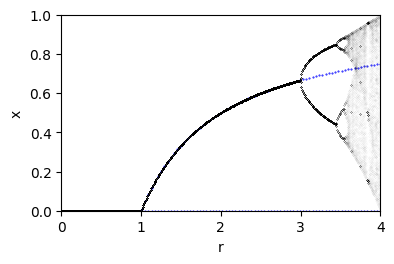

In [4]:
plt.figure(figsize=set_size(595, 0.5))
plt.xlim(0, 4)
plt.xlabel('r')
plt.ylim(0, 1)
plt.ylabel('x')
plt.scatter(rs, xs, c='b', s=.2)

interval = (0, 4)  # start, end
accuracy = 0.01
reps = 600  # number of repetitions
numtoplot = 200
lims = np.zeros(reps)

lims[0] = 1-np.random.rand()
for r in np.arange(interval[0], interval[1], accuracy):
    for i in range(reps-1):
        lims[i+1] = logistic(lims[i], r)

    plt.plot([r]*numtoplot, lims[reps-numtoplot:], 'k.', markersize=.02)

plt.savefig('figures/Ex4_Task4_LogisticMap_Bifurcation.png')

## Part 2: Lorenz attractor

In [5]:
def lorenz(t: float, state: tuple,
           sigma: float, beta: float, rho: float) -> list:
    """Lorenz system. Returns a list [dx/dt, dy/dt, dz/dt] to be
    used with PDE solvers."""
    x, y, z = state

    dx_dt = sigma * (y-x)
    dy_dt = x * (rho-z) - y
    dz_dt = x*y - beta*z

    return [sigma * (y - x),    # dx/dt
            x * (rho - z) - y,  # dy/dt
            x * y - beta * z    # dz/dt
            ]

def solve_lorenz_eqs(ts: np.ndarray, x0: list | np.ndarray,
                     sigma: float, beta: float, rho: float) -> tuple:
    """Solves the Lorenz equations. Returns the positions at each time step
    in the form of a tuple (x, y, z)"""
    
    sol = solve_ivp(lorenz, (ts[0], ts[-1]), tuple(x0), t_eval=ts,
                     args=(sigma, beta, rho))  # object of type OdeSolution
    if sol:
        xyz = sol.y
        x, y, z = tuple(np.hsplit(xyz.T, 3))
        return x, y, z
    else:
        raise Exception('Lorenz equation could not be solved.')

t0 = 0.0            # initial time
tf = 1000           # final time
n_steps = 100000    # number of integration steps (fixed for comparison purposes)

ts = np.linspace(t0, tf, n_steps)

In [6]:
trajectory_rho28 = solve_lorenz_eqs(ts=ts, x0=[10, 10, 10],
                              sigma=10, beta=8./3., rho=28)

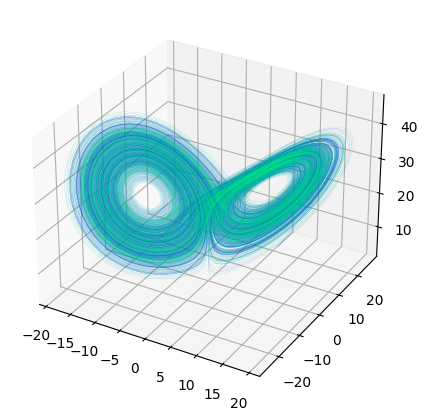

In [7]:
fig = plt.figure(figsize=set_size(width=595, fraction=1))
ax = fig.add_subplot(111, projection='3d')
multicolored_line(*trajectory_rho28, ax, s=10)

fig.savefig('figures/Ex4_Task4_LorenzAttractor_Traj_Rho_28.png')

In [8]:
trajectory_rho28_mod = solve_lorenz_eqs(ts=ts, x0=[10+1e-8, 10, 10],
                              sigma=10, beta=8./3., rho=28)

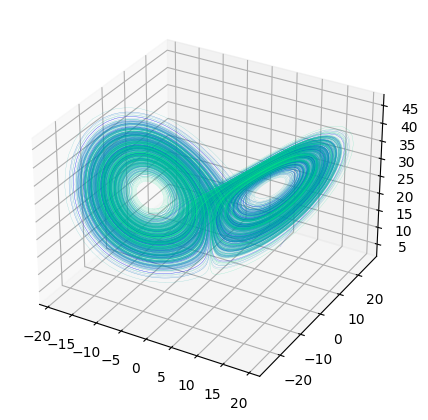

In [9]:
fig = plt.figure(figsize=set_size(width=595, fraction=1))
ax = fig.add_subplot(111, projection='3d')
multicolored_line(*trajectory_rho28_mod, ax, s=10)
fig.savefig('figures/Ex4_Task4_LorenzAttractor_Traj_Mod_Rho_28.png')

In [10]:
trajectory_rho28_comp = np.zeros(n_steps)
found_discrepancy_gt1 = False

for i in range(n_steps):
    xyz = np.array([q[i] for q in trajectory_rho28])
    xyz_mod = np.array([q[i] for q in trajectory_rho28_mod])
    discrepancy = np.linalg.norm(xyz - xyz_mod)**2

    # Checks if discrepancy is greater than one
    if discrepancy > 1 and not found_discrepancy_gt1:
        print(ts[i])
        found_discrepancy_gt1 = True

    trajectory_rho28_comp[i] = discrepancy

24.810248102481026


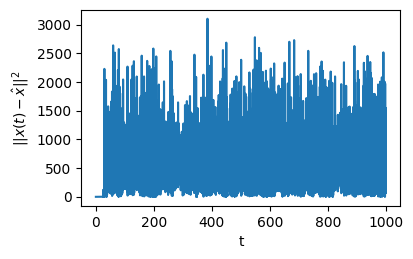

In [11]:
fig, ax = plt.subplots(figsize=set_size(width=595, fraction=0.5))
ax.set_xlabel('t')
ax.set_ylabel(r'$||x(t)-\hat{x}||^2$')
ax.plot(ts, trajectory_rho28_comp)
fig.savefig('figures/Ex4_Task4_LorenzAttractor_Traj_Rho_28_Comparison.pdf')

In [12]:
trajectory_rhop5 = solve_lorenz_eqs(ts=ts, x0=[10, 10, 10],
                              sigma=10, beta=8./3., rho=.5)

Final position: x=-1.58e-06, y=8.27e-08, z=4.72e-14


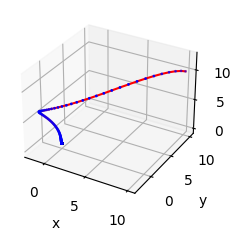

In [13]:
fig = plt.figure(figsize=set_size(width=595, fraction=0.5))
ax = fig.add_subplot(111, projection='3d')

ax.plot(*trajectory_rhop5, 'r-')
ax.scatter(*trajectory_rhop5, c=ts, cmap='bwr', s=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.savefig('figures/Ex4_Task4_LorenzAttractor_Traj_Rho_p5.png')

xf, yf, zf = (x[-1][0] for x in trajectory_rhop5)
print(f'Final position: x={xf:.2e}, y={yf:.2e}, z={zf:.2e}')

In [14]:
trajectory_rhop5_mod = solve_lorenz_eqs(ts=ts, x0=[10+1e-8, 10, 10],
                                        sigma=10, beta=8./3., rho=.5)

Final position: x=-1.58e-06, y=8.27e-08, z=4.72e-14


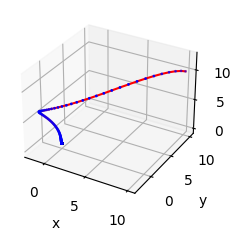

In [15]:
fig = plt.figure(figsize=set_size(width=595, fraction=0.5))
ax = fig.add_subplot(111, projection='3d')

ax.plot(*trajectory_rhop5_mod, 'r-')
ax.scatter(*trajectory_rhop5_mod, c=ts, cmap='bwr', s=1)
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.savefig('figures/Ex4_Task4_LorenzAttractor_Traj_Mod_Rho_p5.png')

xf, yf, zf = (x[-1][0] for x in trajectory_rhop5_mod)
print(f'Final position: x={xf:.2e}, y={yf:.2e}, z={zf:.2e}')

In [16]:
trajectory_rhop5_comp = np.zeros(n_steps)
found_discrepancy_gt1 = False

for i in range(n_steps):
    xyz = np.array([q[i] for q in trajectory_rhop5])
    xyz_mod = np.array([q[i] for q in trajectory_rhop5_mod])
    discrepancy = np.linalg.norm(xyz - xyz_mod)**2

    # Checks if discrepancy is greater than one
    if discrepancy > 1 and not found_discrepancy_gt1:
        print(ts[i])
        found_discrepancy_gt1 = True

    trajectory_rhop5_comp[i] = discrepancy

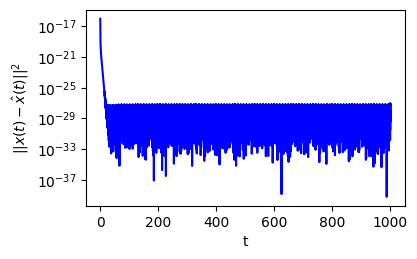

In [17]:
fig, ax = plt.subplots(figsize=set_size(width=595, fraction=0.5))
ax.set_xlabel('t')
ax.set_ylabel(r'$||x(t)-\hat{x}(t)||^2$')
ax.plot(ts, trajectory_rhop5_comp, 'b')
ax.set_yscale('log')
fig.savefig('figures/Ex4_Task4_LorenzAttractor_Traj_Rho_p5_Comparison.pdf')